In [15]:
%matplotlib inline

import pymysql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from IPython.display import display, HTML

In [3]:
conn = pymysql.connect(host='104.196.5.55', user='root', passwd='', db='nfl')
cur = conn.cursor()

In [4]:
def query_sql(tbl_name):
    strSQL = ("Select * from " + tbl_name)
    df = pd.DataFrame(pd.read_sql(strSQL,conn,params=None))
    return df

#Clean this up with dictionary
df_td = query_sql("td")
df_pass = query_sql("pass")
df_offense = query_sql("offense")
df_play = query_sql("play")
df_player = query_sql("player")

df_offense = df_offense[['uid','gid','player','py','ints','tdp','ra','sra','ry','tdr','trg','rec','recy','tdrec','ret','rety','tdret','fuml','conv','fp','fp2','fp3']]
df_player = df_player[['player','pname','pos1','dcp']]
df_player = df_player[(df_player.pos1 == 'QB') ^ (df_player.pos1 == 'RB') ^ (df_player.pos1 == 'WR') ^ (df_player.pos1 == 'TE')]
df_play = df_play[['gid','pid']]

In [127]:
df_offense_player = pd.merge(df_offense,df_player,how='inner',on='player')

In [132]:
df_offense_player.groupby(['pos1','dcp'])['fp'].agg(np.mean)

pos1  dcp
DB    0       1.131954
      1       1.018846
      2       0.890909
      3       0.300000
      4       2.233333
DL    0       1.773684
      1       2.042308
      2       3.275000
K     0       0.427077
      1       0.505941
      2       0.120000
LB    0       2.455319
      1       3.075000
      3       2.300000
LS    1       0.000000
OL    0       1.302804
      1       1.800000
      2       0.573333
      3       0.700000
QB    0      10.249957
      1      15.821451
      2       9.847926
      3       8.236056
      4      11.915556
      5       4.165455
RB    0       5.273152
      1       8.674561
      2       7.182572
      3       5.822580
      4       4.971868
      5       5.116364
TE    0       2.951254
      1       5.234045
      2       2.969844
      3       2.548832
      4       2.287568
      5       3.640404
WR    0       4.637342
      1       8.282907
      2       4.170085
      3       3.896526
      4       5.171294
      5       2.337391
N

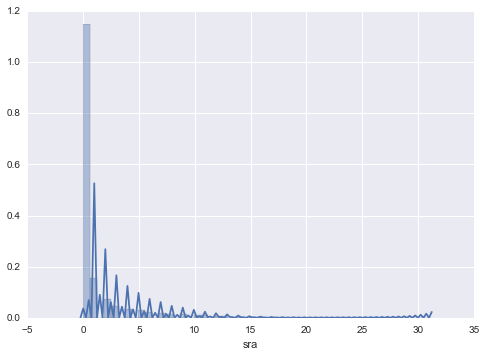

In [16]:
sns.distplot(x)

In [17]:
def query_sql(tbl_name):
    strSQL = ("Select * from " + tbl_name)
    df = pd.DataFrame(pd.read_sql(strSQL,conn,params=None))
    return df

In [42]:
df_team = query_sql('team')
df_game = query_sql('game')

In [95]:
df_team_2015 = pd.merge(df_team,df_game[['gid','seas','h','v']],how='left',on='gid')
df_team_2015 = df_team_2015[['gid','seas','tname','pts','s1pp','s2pp','s3pp','p1a','p2a','p3a','h','v']]
df_team_2015['opp_s1pp_allowed'] = df_team_2015['s1pp']/df_team_2015['p1a']
df_team_2015['opp_s2pp_allowed'] = df_team_2015['s2pp']/df_team_2015['p2a']
df_team_2015['opp_s3pp_allowed'] = df_team_2015['s3pp']/df_team_2015['p3a']

df_team_2015['opp_s1pp_allowed']=df_team_2015['opp_s1pp_allowed'].fillna(0)
df_team_2015['opp_s2pp_allowed']=df_team_2015['opp_s2pp_allowed'].fillna(0)
df_team_2015['opp_s3pp_allowed']=df_team_2015['opp_s3pp_allowed'].fillna(0)



,player,pname,pos1
0,AA-0025,A.Abdullah,RB
7,AA-0525,A.Alexander,RB
10,AA-0600,A.al-Jabbar,RB
12,AA-0800,A.Allen,RB
14,AA-0900,A.Allen,RB
16,AA-1100,A.Allison,WR
18,AA-1300,A.Anderson,RB
19,AA-1350,A.Andrews,RB
23,AA-1600,A.Armstrong,WR
24,AA-1700,A.Arrington,WR


In [122]:
df_team_year = pd.merge(df_team,df_game[['gid','seas','h','v']],how='left',on='gid')


df_offense_year = pd.merge(df_offense,df_game[['gid','seas','h','v']],how='left',on='gid')

df_offense_year.groupby(['seas','pos1'])['recy'].agg(np.mean)


df_player = query_sql("player")

df_offense_year_player = pd.merge(df_offense_year_player,df_player['gid','dcp'],how='left','')


,uid,gid,player,py,ints,tdp,ra,sra,ry,tdr,...,rety,tdret,fuml,conv,fp,fp2,fp3,seas,h,v
0,1,1,KW-1500,0,0,0,0,0,0,0,...,56,0,0,0,0.00,0.00,0.00,2000,ATL,SF
1,2,1,CG-0400,0,0,0,15,7,62,0,...,0,0,0,0,10.70,12.20,13.70,2000,ATL,SF
2,3,1,JG-0600,252,1,3,2,1,22,0,...,0,0,0,0,22.28,23.28,22.28,2000,ATL,SF
3,4,1,JR-2000,0,0,0,1,0,-2,0,...,0,0,0,0,5.70,8.20,10.70,2000,ATL,SF
4,5,1,TO-0200,0,0,0,0,0,0,0,...,0,0,0,0,13.20,16.70,20.20,2000,ATL,SF
5,6,1,FB-0200,0,0,0,5,2,10,1,...,0,0,0,0,21.50,23.00,24.50,2000,ATL,SF
6,7,1,JA-1600,0,0,0,24,10,77,0,...,0,0,1,0,7.70,8.20,9.70,2000,ATL,SF
7,8,1,CC-1400,264,0,2,4,1,12,0,...,0,0,0,0,19.36,19.86,20.36,2000,ATL,SF
8,9,1,BC-1100,0,0,0,3,0,5,0,...,0,0,0,0,1.70,2.20,2.70,2000,ATL,SF
9,10,1,TM-0900,0,0,0,0,0,0,0,...,0,0,0,0,13.20,14.70,16.20,2000,ATL,SF


In [126]:
df_offense_year.columns

Index([   u'uid',    u'gid', u'player',     u'py',   u'ints',    u'tdp',
           u'ra',    u'sra',     u'ry',    u'tdr',    u'trg',    u'rec',
         u'recy',  u'tdrec',    u'ret',   u'rety',  u'tdret',   u'fuml',
         u'conv',     u'fp',    u'fp2',    u'fp3',   u'seas',      u'h',
            u'v'],
      dtype='object')

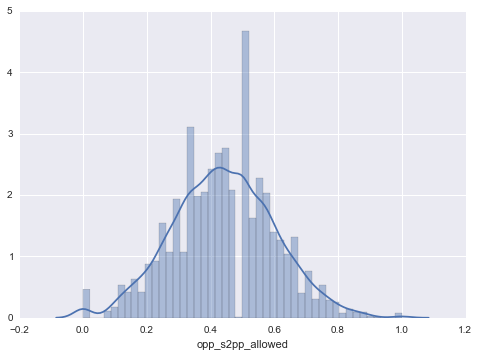

In [83]:
x = df_team_2015['opp_s2pp_allowed']
sns.distplot(x)

In [137]:
df_injury = query_sql("injury")
df_player

,player,fname,lname,pname,pos1,pos2,height,weight,yob,forty,...,shuttle,cone,dpos,col,dv,start,cteam,posd,jnum,dcp
0,AA-0025,Ameer,Abdullah,A.Abdullah,RB,,69,205,1993,4.50,...,3.95,6.79,54,Nebraska,Big Ten,2015,DET,RB,21,1
1,AA-0050,Aaron,Adams,A.Adams,OL,,77,305,1989,5.26,...,4.61,7.61,0,Eastern Kentucky,Ohio Valley,2013,INA,INA,0,0
2,AA-0100,Anthony,Adams,A.Adams,DL,,72,300,1980,5.13,...,4.59,7.68,57,Penn State,Big Ten,2003,INA,INA,0,0
3,AA-0200,Al,Afalava,A.Afalava,DB,,71,212,1987,4.48,...,4.07,6.60,190,Oregon State,Pacific 10,2009,INA,INA,0,0
4,AA-0300,Anthony,Alabi,A.Alabi,OL,,77,315,1981,5.12,...,4.60,7.64,162,Texas Christian,Mountain West (MWC),2006,INA,INA,0,0
5,AA-0400,Alex,Albright,A.Albright,LB,,77,260,1988,4.86,...,4.03,6.98,0,Boston College,Atlantic Coast (ACC),2011,INA,INA,0,0
6,AA-0500,Allen,Aldridge,A.Aldridge,LB,,73,254,1972,0.00,...,0.00,0.00,51,Houston,Southwest,1994,INA,INA,0,0
7,AA-0525,Alvester,Alexander,A.Alexander,RB,,70,206,1990,4.45,...,4.21,6.89,0,Wyoming,Mountain West (MWC),2012,INA,INA,0,0
8,AA-0543,Adrian,Amos,A.Amos,DB,,72,218,1993,4.39,...,4.03,7.09,142,Penn State,Big Ten,2015,CHI,FS,38,1
9,AA-0562,Arik,Armstead,A.Armstead,DL,,79,292,1993,5.06,...,4.53,7.57,17,Oregon,Pacific 12,2015,SF,LDT,69,3


In [139]:
df_injury_player = pd.merge(df_injury,df_player[['pname','player']],how='left',on='player')

In [141]:
df_injury_player_game = pd.merge(df_injury_player,df_game[['gid','seas']],how='left',on='gid')

In [145]:
df_injury

,gid,player,team,details,pstat,gstat
0,3990,TF-0750,NE,Knee,Full Participation in Practice,Questionable
1,3990,TW-3250,NE,Quadricep,Limited Participation in Practice,Questionable
2,3990,TC-0050,NE,Hamstring,Full Participation in Practice,Questionable
3,3990,BS-4350,NE,Concussion,Did Not Participate In Practice,Out
4,3990,LJ-1250,PIT,Concussion,Did Not Participate In Practice,Out
5,3991,MW-3250,CHI,Hamstring,Limited Participation in Practice,Questionable
6,3991,TP-2000,CHI,Hamstring,Did Not Participate In Practice,Out
7,3991,SA-0100,CHI,Illness,Did Not Participate In Practice,Out
8,3991,AJ-0430,CHI,Calf,Limited Participation in Practice,Questionable
9,3991,ER-0500,CHI,Hip,Limited Participation in Practice,Questionable
